In [263]:
!nvidia-smi

NotImplementedError: ignored

In [241]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content/GroundingDINO


In [245]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO

!pip install -q -e .
!pip install -q roboflow

/content/GroundingDINO


NotImplementedError: ignored

In [4]:
import os

GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [260]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content/GroundingDINO


NotImplementedError: ignored

In [6]:
import os

GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))


/content/weights/groundingdino_swint_ogc.pth ; exist: True


In [259]:
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data


/content/GroundingDINO


NotImplementedError: ignored

In [253]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(GROUNDING_DINO_CONFIG_PATH, GROUNDING_DINO_CHECKPOINT_PATH)

[Errno 2] No such file or directory: '/content/GroundingDINO/GroundingDINO'
/content/GroundingDINO
final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [261]:


from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(GROUNDING_DINO_CONFIG_PATH, GROUNDING_DINO_CHECKPOINT_PATH)

final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


**TEST CODE**

In [254]:
import supervision as sv

In [255]:
img_name="polythene.jpeg"
img_path= os.path.join(HOME, "data", img_name)

In [256]:
prompt= " plastic, paper, dog, cat"
BOX_TRESHOLD = 0.45
TEXT_TRESHOLD = 0.35

In [262]:
image_source, image = load_image(img_path)

FileNotFoundError: ignored

In [246]:
boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=prompt,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

In [233]:
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits,phrases=phrases)

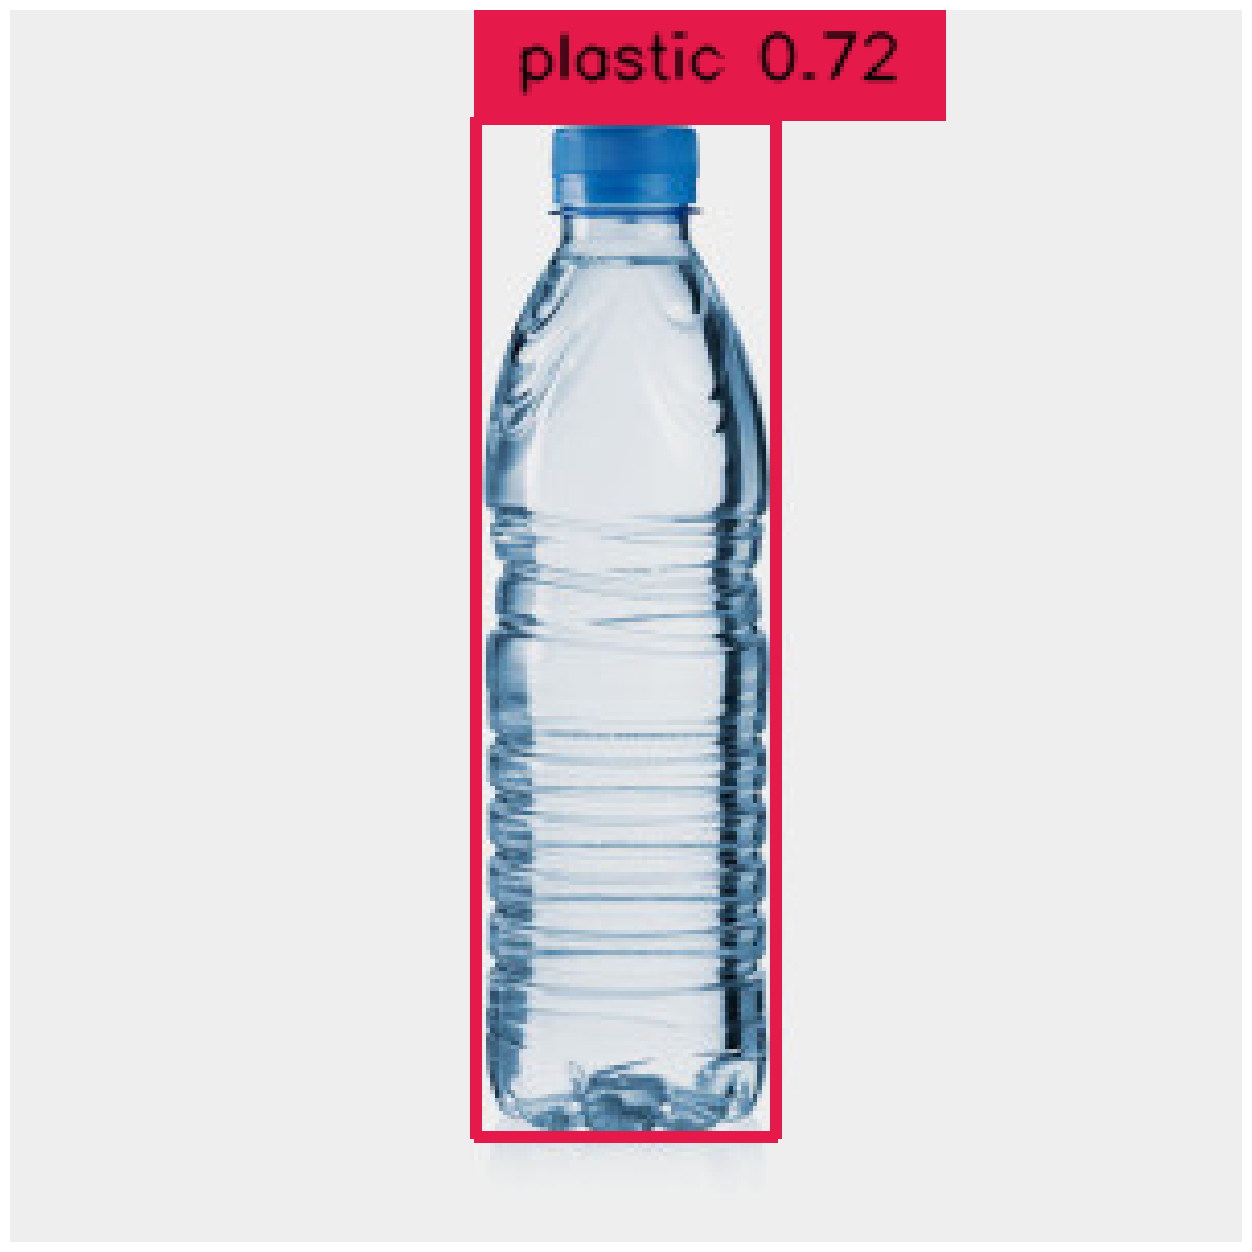

In [234]:
%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))